# Closing Time (CAPM)

Jennifer McDougall is considering investing in mutual funds for the first time, and has narrowed her options down to three: one that is domiciled in Germany, and two that are domiciled in Luxembourg. As a cautious risk averse investor, Jennifer has done some extensive research on the three funds, and has come across a curious fact: the beta of the German fund is surprisingly low.

After speaking to her financial planner, she learns there is no legal requirement in Germany for mutual funds to compute net asset values at a particular time of the day. If the German fund is closing its books in the middle of the day and its net asset values reflect its midday holdings, rather than end-of-day holdings, this could explain the low beta. Thus, German fund might appear less risky, without actually being so. Jennifer needed to get a clearer picture of what was going on before making her decision. 











# Libraries

Let's start by importing the libraries we will need to solve the case and help Jennifer pick the best fund.

In [1]:
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# This will make some of our output less verbose when we use display()
pd.set_option('display.max_rows', 10)
# This will make pandas print 6 decimal points (as opposed to using scientific
# notation)
pd.options.display.float_format = '{:.8f}'.format

Note that we're using two (well, three) libraries that we haven't used before.

*   [``pandas``](https://pandas.pydata.org/), or Python Data Analysis Library is one of the foundational Python data science libraries.
 * We'll be using it to represent tables of data as [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
 * A cute introduction to ``pandas`` for Excel users is [here](https://towardsdatascience.com/intro-to-pandas-for-excel-super-users-dac1b38f12b0).
*  [``statsmodels``](https://www.statsmodels.org/stable/index.html) is a very helpful library for statistical modeling.
  * We'll be using it for doing linear regression (or, as they call it, Ordinary Least Squares)

# Loading Our Data

We'll be working with [this](https://drive.google.com/file/d/1wGzelrmSVJIl1RUhq-GCAxMvVCDb0cR-/view?usp=sharing) CSV file's data.

To load that into a ``pandas`` DataFrame, we can just call the [``read_csv``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function with a URL for the file.

Most ``pandas`` code on the internet uses the variable ``df`` for their DataFrame.

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1wGzelrmSVJIl1RUhq-GCAxMvVCDb0cR-')

Let's take a look at what we loaded!

In [4]:
df

,Date,Generali Investments,Allianz Adifonds,Parvest Equity,DAX at 9:00,DAX at 10:00,DAX at 11:00,DAX at 12:00,DAX at 13:00,DAX at 14:00,DAX at 15:00,DAX at 16:00,DAX at 17:00,DAX at 23:00,Risk-free rate
0,1/5/2010,0.01444516,0.00598991,0.00380421,0.00611323,0.00360428,0.00578816,0.00755277,0.00728983,0.00863151,0.00449834,-0.00046948,0.00359131,-0.00271812,0.00019958
1,1/6/2010,-0.00017365,-0.00172360,-0.00138959,-0.00271812,-0.00101426,-0.00445926,-0.00252077,-0.00137029,-0.00372093,0.00015911,0.00175102,-0.00230964,0.00040949,0.00019958
2,1/7/2010,0.00137705,-0.00973160,0.00075901,0.00040949,-0.00888544,-0.00788479,-0.00882675,-0.00535115,-0.00471375,-0.00399030,-0.00752866,-0.00159300,-0.00248081,0.00019958
3,1/8/2010,-0.00111499,0.00935172,0.00113766,-0.00248081,0.01157629,0.01160120,0.01103676,0.00642293,0.00564628,-0.00263869,0.00527532,0.00129203,0.00303188,0.00019958
4,1/11/2010,0.00262936,0.00722362,0.00265151,0.00303188,0.00820228,0.00805503,0.00645512,0.00519992,0.00674180,0.01358367,0.00460829,0.00217821,0.00047867,0.00019958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,12/22/2010,0.00858392,0.00189676,-0.00085662,0.00846180,0.00246367,0.00232880,0.00172966,0.00159879,0.00184895,0.00033063,0.00040422,-0.00009185,-0.00142272,0.00036677
250,12/23/2010,-0.00061781,0.00135226,-0.00150038,-0.00142272,-0.00055682,-0.00048475,-0.00039281,-0.00027429,-0.00101886,-0.00185034,-0.00155123,-0.00270900,-0.00144738,0.00036677
251,12/27/2010,-0.00092729,-0.01255908,-0.01137705,-0.00144738,-0.01429153,-0.01383117,-0.01314880,-0.01522004,-0.01534516,-0.01533959,-0.01420771,-0.01147758,-0.01232131,0.00036677
252,12/28/2010,-0.01011362,0.00205142,0.00043426,-0.01232131,0.00104720,0.00067674,0.00018334,0.00222451,0.00226840,0.00278948,0.00070333,-0.00130873,0.00019654,0.00036677



The provided CSV data file contains all necessary data to answer the case questions and covers all working days from January through December 2010. Two days with missing data have been removed from the dataset. 

We can also get some basic statistics by calling [``DataFrame.describe``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html). Note that by default this will only include the numerical columns (so it won't print the Date column)

In [5]:
df.describe()

,Generali Investments,Allianz Adifonds,Parvest Equity,DAX at 9:00,DAX at 10:00,DAX at 11:00,DAX at 12:00,DAX at 13:00,DAX at 14:00,DAX at 15:00,DAX at 16:00,DAX at 17:00,DAX at 23:00,Risk-free rate
count,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000,254.00000000
mean,0.00067156,0.00062687,0.00066881,0.00064966,0.00066450,0.00066041,0.00067221,0.00066859,0.00066766,0.00066296,0.00065313,0.00064658,0.00063879,0.00025736
std,0.01081473,0.01077623,0.00935092,0.01150606,0.01156632,0.01156097,0.01139902,0.01093903,0.01116785,0.01115141,0.01132220,0.01132023,0.01150218,0.00007219
min,-0.03271086,-0.03637725,-0.02492370,-0.03332511,-0.03903192,-0.04083216,-0.03742007,-0.03464169,-0.03253350,-0.03368110,-0.03262266,-0.03629565,-0.03332511,0.00018147
25%,-0.00403222,-0.00559482,-0.00355011,-0.00491893,-0.00601182,-0.00506301,-0.00585792,-0.00569243,-0.00544189,-0.00613125,-0.00512227,-0.00528671,-0.00491893,0.00019053
50%,0.00095443,0.00155682,0.00074865,0.00095805,0.00155215,0.00164422,0.00142691,0.00147470,0.00144355,0.00098690,0.00128975,0.00106281,0.00095805,0.00026291
75%,0.00647282,0.00721628,0.00565185,0.00722311,0.00784616,0.00805381,0.00754060,0.00725629,0.00768093,0.00706487,0.00687238,0.00657022,0.00722311,0.00029002
max,0.04936230,0.02863051,0.04303599,0.05298604,0.03043854,0.03401799,0.02837307,0.02878142,0.03415973,0.03788284,0.03468523,0.04778444,0.05298604,0.00037579


# Question 1: Fitting Funds to the DAX

In this section we'll be fitting the funds to the DAX at various times, in an effort to see at what time we get the best fit.

## Statsmodels and R formula syntax

We'll be making use of the [``statsmodels``](https://www.statsmodels.org/stable/index.html) library to do this.

One of the features of ``statsmodels`` is that it allows us to specify formulas using [R](https://www.r-project.org/about.html) formula syntax, which can be very clear and concise.

In R formula syntax, we can specify that we want our "response variable" (or dependent variable) to be explained by some "explanatory variables" (independent variables) as follows


```
response variable ~ explanatory variables
```

We will first try to explain ``Generali Investments`` by ``DAX at 9:00``.

## Fitting Generali Investments to DAX at 9:00


Let's write out the formula that we will want to use for our model.

Note that because ``Generali Investments`` isn't a single-word column name, we will need to use [Q](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.Q) syntax to specify the variable name.

In [7]:
formula_0900 = 'Q("Generali Investments") ~ Q("DAX at 9:00")'
formula_0900

'Q("Generali Investments") ~ Q("DAX at 9:00")'

We'll be using the ``statsmodels`` functions [``linear_model.OLS``](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html) and [``linear_model.OLS.fit``](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.fit.html) to compute or linear fit.

The ``fit`` function will return a [``RegressionResults``](https://www.statsmodels.org/0.8.0/generated/statsmodels.regression.linear_model.RegressionResults.html) in ``linear_fit_0900``.

In [8]:
linear_model_0900 = smf.ols(formula=formula_0900, data=df) 
linear_fit_0900 = linear_model_0900.fit()
display(linear_fit_0900.summary())

AssertionError: 

We can also plot the results directly using the [``statsmodels.graphics.plot_fit``](http://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_fit.html) function.

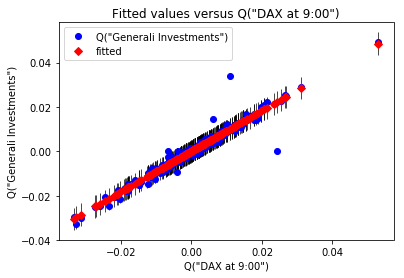

In [8]:
sm.graphics.plot_fit(linear_fit_0900, 'Q("DAX at 9:00")')
plt.show()

## Fitting to DAX at 12:00
Let's run the same analysis but with data at a different closing time.

In [9]:
formula_1200 = 'Q("Generali Investments") ~ Q("DAX at 12:00")'
linear_fit_1200 = smf.ols(formula=formula_1200, data=df).fit()
display(linear_fit_1200.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q("Generali Investments")   R-squared:                       0.173
Model:                                   OLS   Adj. R-squared:                  0.170
Method:                        Least Squares   F-statistic:                     52.78
Date:                       Mon, 15 Apr 2019   Prob (F-statistic):           4.66e-12
Time:                               22:37:09   Log-Likelihood:                 814.06
No. Observations:                        254   AIC:                            -1624.
Df Residuals:                            252   BIC:                            -1617.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004      0.001      0.656      0.513      -0.001       0.002
Q("DAX at 12:00")     0.3948      0.054      7.265      0.000       0.288       0.502
==============================================================================
Omnibus:                       35.231   Durbin-Watson:                   2.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.446
Skew:                           0.226   Prob(JB):                     3.67e-48
Kurtosis:                       7.521   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Q:** How would you qualify this fit? Is it a good fit or a bad fit? What metric would you look at in order to support your analysis?

Let's plot our fit to see if it agrees with our analysis? What do we think the plot will look like compared to the previous plot of 9:00?

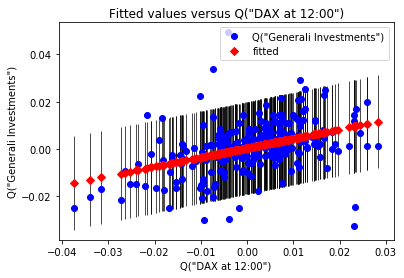

In [10]:
sm.graphics.plot_fit(linear_fit_1200, 'Q("DAX at 12:00")')
plt.show()

## Getting More Details for our Fit

In addition to calling ``summary`` on ``linear_fit``, we can query any of its other properties, which are can be found in the [``RegressionResults``](https://www.statsmodels.org/0.8.0/generated/statsmodels.regression.linear_model.RegressionResults.html) documentation.

We may be interested in
* ``linear_fit.params`` which has our $\alpha$ and $\beta$.
* ``bse`` which has "the standard errors of the parameter estimates".
* ``tvalues`` and ``pvalues`` which have our $t$ and $p$-values.
*  [``conf_int``](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.conf_int.html#statsmodels.regression.linear_model.RegressionResults.conf_int) which gives us our confidence interval.
* ``rsquared`` which gives us our $R^2$ value.

Most of these functions give values for every dependent variable, and we can select the dependent variable that we're interested in.

In [11]:
display(linear_fit_0900.params)

Intercept          0.00007743
Q("DAX at 9:00")   0.91452797
dtype: float64

In [12]:
display(linear_fit_0900.pvalues)

Intercept          0.62276502
Q("DAX at 9:00")   0.00000000
dtype: float64

In [13]:
display(linear_fit_0900.conf_int())

,0,1
Intercept,-0.00023218,0.00038705
"Q(""DAX at 9:00"")",0.88760914,0.94144679


### Putting them in our own ``DataFrame``

Let's create our own ``DataFrame`` with the times for rows and the properties of our linear fit in the columns.

First, let's define what our columns will be.

In [14]:
linear_fit_results_columns = [
  'Time', 'beta', 'sigma', 't', 'p-value', 'conf-lo', 'conf-hi', 'rsquared'
]
display(linear_fit_results_columns)

['Time', 'beta', 'sigma', 't', 'p-value', 'conf-lo', 'conf-hi', 'rsquared']

And now let's create an empty ``DataFrame`` called ``linear_fit_results_df`` with those columns.

In [15]:
linear_fit_results_df = pd.DataFrame(columns=linear_fit_results_columns)
display(linear_fit_results_df)

,Time,beta,sigma,t,p-value,conf-lo,conf-hi,rsquared


Now let's add a row for the data at 9:00am. One way to add a row to a ``DataFrame`` is to create a [``dictionary``](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) specifying the row's values for each column.

In [16]:
row_for_0900 = {
  'Time' : '9:00',
  'beta' : linear_fit_0900.params['Q("DAX at 9:00")'],
  'sigma' : linear_fit_0900.bse['Q("DAX at 9:00")'],
  't' : linear_fit_0900.tvalues['Q("DAX at 9:00")'],
  'p-value' : linear_fit_0900.pvalues['Q("DAX at 9:00")'],
  'conf-lo' : linear_fit_0900.conf_int().at['Q("DAX at 9:00")',0],
  'conf-hi' : linear_fit_0900.conf_int().at['Q("DAX at 9:00")',1],
  'rsquared' : linear_fit_0900.rsquared
}
display(row_for_0900)

{'Time': '9:00',
 'beta': 0.9145279651065021,
 'conf-hi': 0.941446789848359,
 'conf-lo': 0.8876091403646453,
 'p-value': 1.8682207538862815e-162,
 'rsquared': 0.9467085753902427,
 'sigma': 0.013668385824825522,
 't': 66.90826384527934}

Now we can use [``DataFrame.append``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) to append it to our ``linear_fit_results_df``.

In [17]:
linear_fit_results_df = linear_fit_results_df.append(
    row_for_0900, ignore_index=True)
display(linear_fit_results_df)


,Time,beta,sigma,t,p-value,conf-lo,conf-hi,rsquared
0,9:00,0.91452797,0.01366839,66.90826385,0.00000000,0.88760914,0.94144679,0.94670858


And let's do the same thing for 12:00pm.

In [18]:
row_for_1200 = {
  'Time' : '12:00',
  'beta' : linear_fit_1200.params['Q("DAX at 12:00")'],
  'sigma' : linear_fit_1200.bse['Q("DAX at 12:00")'],
  't' : linear_fit_1200.tvalues['Q("DAX at 12:00")'],
  'p-value' : linear_fit_1200.pvalues['Q("DAX at 12:00")'],
  'conf-lo' : linear_fit_1200.conf_int().at['Q("DAX at 12:00")',0],
  'conf-hi' : linear_fit_1200.conf_int().at['Q("DAX at 12:00")',1],
  'rsquared' : linear_fit_1200.rsquared
}
linear_fit_results_df = linear_fit_results_df.append(row_for_1200, ignore_index=True)
display(linear_fit_results_df)

,Time,beta,sigma,t,p-value,conf-lo,conf-hi,rsquared
0,9:00,0.91452797,0.01366839,66.90826385,0.00000000,0.88760914,0.94144679,0.94670858
1,12:00,0.39480509,0.05434461,7.26484423,0.00000000,0.28777761,0.50183258,0.17316856


## Fitting Generali Investments to the DAX at all Times

If we wanted to create a table for all times, we *could* copy-paste the above code for the remaining 8 rows, but our fingers would probably start hurting, and it's guaranteed we'd make a typo.

Let's use a for-loop to generate the full ``DataFrame`` for all times. Let's start by listing all of the times.

In [19]:
all_times = ['9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00',
             '16:00', '17:00', '23:00']
display(all_times)

['9:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '23:00']

And now let's run that same code we did before, just this time for each ``time`` in ``all_times``.

In [20]:
# We'll start with an empty DataFrame, with the columns we wanted.
linear_fit_results_df = pd.DataFrame(columns=linear_fit_results_columns)

# We'll add a row to it for every time.
for time in all_times:
  # First, let's set up our formula.
  
  # Our independent variable is going to be Q("DAX at ###") for each of our
  # times.
  independent_var = 'Q("DAX at ' + time + '")'

  # Our dependent variable will be the fund name (with the Q syntax).
  dependent_var = 'Q("Generali Investments")'

  # Our formula is simply dependent variable ~ independent variable.
  formula = dependent_var + ' ~ ' + independent_var

  # Perform the linear regression, and let linear_fit be the RegressionResults.
  linear_fit = smf.ols(formula=formula, data=df).fit()

  # Create the dictionary for the new row we'll be adding.
  new_row = {
      'Time' : time,
      'beta' : linear_fit.params[independent_var],
      'sigma' : linear_fit.bse[independent_var],
      't' : linear_fit.tvalues[independent_var],
      'p-value' : linear_fit.pvalues[independent_var],
      'conf-lo' : linear_fit.conf_int().at[independent_var,0],
      'conf-hi' : linear_fit.conf_int().at[independent_var,1],
      'rsquared' : linear_fit.rsquared
  }

  # Add the row
  linear_fit_results_df = linear_fit_results_df.append(
      new_row, ignore_index=True)

# Print out our results!
display(linear_fit_results_df)

,Time,beta,sigma,t,p-value,conf-lo,conf-hi,rsquared
0,9:00,0.91452797,0.01366839,66.90826385,0.00000000,0.88760914,0.94144679,0.94670858
1,10:00,0.53679157,0.04822708,11.13050038,0.00000000,0.44181208,0.63177107,0.32958761
2,11:00,0.45662729,0.05143039,8.87854967,0.00000000,0.35533913,0.55791546,0.23827636
3,12:00,0.39480509,0.05434461,7.26484423,0.00000000,0.28777761,0.50183258,0.17316856
4,13:00,0.39938851,0.05697017,7.01048450,0.00000000,0.28719018,0.51158684,0.16319907
5,14:00,0.34507507,0.05699777,6.05418488,0.00000001,0.23282237,0.45732776,0.12697992
6,15:00,0.28695402,0.05835662,4.91724883,0.00000158,0.17202519,0.40188285,0.08754940
7,16:00,0.17722017,0.05912590,2.99733552,0.00299562,0.06077629,0.29366405,0.03442364
8,17:00,0.06529320,0.06004035,1.08748875,0.27785989,-0.05295160,0.18353801,0.00467106
9,23:00,-0.00089272,0.05922905,-0.01507232,0.98798641,-0.11753974,0.11575430,0.00000090


## Fitting all Funds to the DAX at all Times

We'll want to repeat the above code for each different fund. Let's create a function to do this, with the fund name being a parameter.

This function will return the ``DataFrame`` with the results.

In [0]:
# Our function will take one parameter: the name of the fund. It will return
# a DataFrame of the fit for all times.
def FitFundAtAllTimes(fund):
  # We'll start with an empty DataFrame, with the columns we wanted.
  linear_fit_results_df = pd.DataFrame(columns=linear_fit_results_columns)

  # We'll add a row to it for for every time.
  for time in all_times:
    # First, let's set up our formula. Our independent variable is going to
    # be Q("DAX at ###") for each of our times.
    independent_var = 'Q("DAX at ' + time + '")'

    # Our dependent variable will be the fund name (with the Q syntax).
    depdendent_var = 'Q("' + fund + '")'

    # Our formula is simply dependent variable ~ independent variable.
    formula = depdendent_var + ' ~ ' + independent_var

    # Perform the linear regression
    linear_fit = smf.ols(formula=formula, data=df).fit()

    # Create the dictionary for the new row we'll be adding.
    new_row = {
        'Time' : time,
        'beta' : linear_fit.params[independent_var],
        'sigma' : linear_fit.bse[independent_var],
        't' : linear_fit.tvalues[independent_var],
        'p-value' : linear_fit.pvalues[independent_var],
        'conf-lo' : linear_fit.conf_int().at[independent_var,0],
        'conf-hi' : linear_fit.conf_int().at[independent_var,1],
        'rsquared' : linear_fit.rsquared
    }

    # Add the row
    linear_fit_results_df = linear_fit_results_df.append(
        new_row, ignore_index=True)

  # Return our DataFrame with the fitfor all times.
  return linear_fit_results_df

Let's define ``all_funds`` to be the list of all fund names.

In [22]:
all_funds = ['Generali Investments', 'Allianz Adifonds', 'Parvest Equity']
print(all_funds)

['Generali Investments', 'Allianz Adifonds', 'Parvest Equity']


Now let's run that function for all of our funds!

In [23]:
for fund in all_funds:
  # Run our function to get the DataFrame
  linear_fit_results_df = FitFundAtAllTimes(fund)
  # Print the name of the fund
  display(fund)
  # Print the fit DataFrame
  display(linear_fit_results_df)
  # Print a blank line (just for readability)
  print('')

'Generali Investments'

,Time,beta,sigma,t,p-value,conf-lo,conf-hi,rsquared
0,9:00,0.91452797,0.01366839,66.90826385,0.00000000,0.88760914,0.94144679,0.94670858
1,10:00,0.53679157,0.04822708,11.13050038,0.00000000,0.44181208,0.63177107,0.32958761
2,11:00,0.45662729,0.05143039,8.87854967,0.00000000,0.35533913,0.55791546,0.23827636
3,12:00,0.39480509,0.05434461,7.26484423,0.00000000,0.28777761,0.50183258,0.17316856
4,13:00,0.39938851,0.05697017,7.01048450,0.00000000,0.28719018,0.51158684,0.16319907
5,14:00,0.34507507,0.05699777,6.05418488,0.00000001,0.23282237,0.45732776,0.12697992
6,15:00,0.28695402,0.05835662,4.91724883,0.00000158,0.17202519,0.40188285,0.08754940
7,16:00,0.17722017,0.05912590,2.99733552,0.00299562,0.06077629,0.29366405,0.03442364
8,17:00,0.06529320,0.06004035,1.08748875,0.27785989,-0.05295160,0.18353801,0.00467106
9,23:00,-0.00089272,0.05922905,-0.01507232,0.98798641,-0.11753974,0.11575430,0.00000090


'Allianz Adifonds'

,Time,beta,sigma,t,p-value,conf-lo,conf-hi,rsquared
0,9:00,0.39180522,0.05358764,7.31148469,0.00000000,0.28626852,0.49734192,0.17500881
1,10:00,0.73237048,0.03627938,20.18696265,0.00000000,0.66092105,0.80381990,0.61790014
2,11:00,0.83690846,0.02585336,32.37135759,0.00000000,0.78599227,0.88782465,0.80613965
3,12:00,0.90616890,0.01697026,53.39745588,0.00000000,0.87274728,0.93959051,0.91879581
4,13:00,0.88438764,0.02733649,32.35190567,0.00000000,0.83055053,0.93822474,0.80595171
5,14:00,0.84434753,0.02942399,28.69588972,0.00000000,0.78639927,0.90229579,0.76568037
6,15:00,0.74268703,0.03894746,19.06894880,0.00000000,0.66598304,0.81939102,0.59065977
7,16:00,0.64358004,0.04417175,14.56994499,0.00000000,0.55658719,0.73057288,0.45722794
8,17:00,0.51724940,0.05034213,10.27468210,0.00000000,0.41810448,0.61639432,0.29524110
9,23:00,0.45594240,0.05155794,8.84330176,0.00000000,0.35440304,0.55748175,0.23683538


'Parvest Equity'

,Time,beta,sigma,t,p-value,conf-lo,conf-hi,rsquared
0,9:00,0.04862164,0.05110326,0.95143918,0.34229312,-0.05202226,0.14926554,0.00357935
1,10:00,0.29989592,0.04729472,6.34100277,0.00000000,0.20675265,0.39303919,0.13760155
2,11:00,0.39361125,0.04451166,8.84287947,0.00000000,0.30594899,0.48127351,0.23681812
3,12:00,0.46018174,0.04277890,10.75721184,0.00000000,0.37593201,0.54443147,0.31469150
4,13:00,0.51031245,0.04320038,11.81268371,0.00000000,0.42523265,0.59539225,0.35638677
5,14:00,0.55365296,0.03956867,13.99220401,0.00000000,0.47572553,0.63158039,0.43722587
6,15:00,0.59223539,0.03739581,15.83694689,0.00000000,0.51858725,0.66588352,0.49881554
7,16:00,0.66688865,0.03069031,21.72961564,0.00000000,0.60644647,0.72733084,0.65201839
8,17:00,0.77415451,0.01815058,42.65178291,0.00000000,0.73840835,0.80990066,0.87832991
9,23:00,0.78937334,0.01224876,64.44516396,0.00000000,0.76525036,0.81349633,0.94279461


# Question 2: Incorporating the Risk-Free Rate

## Creating a new DataFrame incorporating Risk-Free Rate

Let's create a new ``DataFrame`` called ``df_excess`` that has the excess rate for each fund and for the DAX.

Let's start with ``df_excess`` being a verbatim copy of ``df``.

In [24]:
df_excess = df.copy()
display(df_excess)

,Date,Generali Investments,Allianz Adifonds,Parvest Equity,DAX at 9:00,DAX at 10:00,DAX at 11:00,DAX at 12:00,DAX at 13:00,DAX at 14:00,DAX at 15:00,DAX at 16:00,DAX at 17:00,DAX at 23:00,Risk-free rate
0,1/5/2010,0.01444516,0.00598991,0.00380421,0.00611323,0.00360428,0.00578816,0.00755277,0.00728983,0.00863151,0.00449834,-0.00046948,0.00359131,-0.00271812,0.00019958
1,1/6/2010,-0.00017365,-0.00172360,-0.00138959,-0.00271812,-0.00101426,-0.00445926,-0.00252077,-0.00137029,-0.00372093,0.00015911,0.00175102,-0.00230964,0.00040949,0.00019958
2,1/7/2010,0.00137705,-0.00973160,0.00075901,0.00040949,-0.00888544,-0.00788479,-0.00882675,-0.00535115,-0.00471375,-0.00399030,-0.00752866,-0.00159300,-0.00248081,0.00019958
3,1/8/2010,-0.00111499,0.00935172,0.00113766,-0.00248081,0.01157629,0.01160120,0.01103676,0.00642293,0.00564628,-0.00263869,0.00527532,0.00129203,0.00303188,0.00019958
4,1/11/2010,0.00262936,0.00722362,0.00265151,0.00303188,0.00820228,0.00805503,0.00645512,0.00519992,0.00674180,0.01358367,0.00460829,0.00217821,0.00047867,0.00019958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,12/22/2010,0.00858392,0.00189676,-0.00085662,0.00846180,0.00246367,0.00232880,0.00172966,0.00159879,0.00184895,0.00033063,0.00040422,-0.00009185,-0.00142272,0.00036677
250,12/23/2010,-0.00061781,0.00135226,-0.00150038,-0.00142272,-0.00055682,-0.00048475,-0.00039281,-0.00027429,-0.00101886,-0.00185034,-0.00155123,-0.00270900,-0.00144738,0.00036677
251,12/27/2010,-0.00092729,-0.01255908,-0.01137705,-0.00144738,-0.01429153,-0.01383117,-0.01314880,-0.01522004,-0.01534516,-0.01533959,-0.01420771,-0.01147758,-0.01232131,0.00036677
252,12/28/2010,-0.01011362,0.00205142,0.00043426,-0.01232131,0.00104720,0.00067674,0.00018334,0.00222451,0.00226840,0.00278948,0.00070333,-0.00130873,0.00019654,0.00036677


And now let's subtract ``Risk-free rate`` from all funds and from the DAX at all times.

In [25]:
for fund in all_funds:
  df_excess[fund] -= df_excess['Risk-free rate']
for time in all_times:
  df_excess['DAX at ' + time] -= df_excess['Risk-free rate']
display(df_excess)

,Date,Generali Investments,Allianz Adifonds,Parvest Equity,DAX at 9:00,DAX at 10:00,DAX at 11:00,DAX at 12:00,DAX at 13:00,DAX at 14:00,DAX at 15:00,DAX at 16:00,DAX at 17:00,DAX at 23:00,Risk-free rate
0,1/5/2010,0.01424558,0.00579033,0.00360463,0.00591365,0.00340470,0.00558858,0.00735319,0.00709025,0.00843193,0.00429876,-0.00066906,0.00339173,-0.00291770,0.00019958
1,1/6/2010,-0.00037323,-0.00192318,-0.00158917,-0.00291770,-0.00121384,-0.00465884,-0.00272035,-0.00156987,-0.00392051,-0.00004047,0.00155144,-0.00250922,0.00020991,0.00019958
2,1/7/2010,0.00117747,-0.00993118,0.00055943,0.00020991,-0.00908502,-0.00808437,-0.00902633,-0.00555073,-0.00491333,-0.00418988,-0.00772824,-0.00179258,-0.00268039,0.00019958
3,1/8/2010,-0.00131457,0.00915214,0.00093808,-0.00268039,0.01137671,0.01140162,0.01083718,0.00622335,0.00544670,-0.00283827,0.00507574,0.00109245,0.00283230,0.00019958
4,1/11/2010,0.00242978,0.00702404,0.00245193,0.00283230,0.00800270,0.00785545,0.00625554,0.00500034,0.00654222,0.01338409,0.00440871,0.00197863,0.00027909,0.00019958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,12/22/2010,0.00821715,0.00152999,-0.00122339,0.00809503,0.00209690,0.00196203,0.00136289,0.00123202,0.00148218,-0.00003614,0.00003745,-0.00045862,-0.00178949,0.00036677
250,12/23/2010,-0.00098458,0.00098549,-0.00186715,-0.00178949,-0.00092359,-0.00085152,-0.00075958,-0.00064106,-0.00138563,-0.00221711,-0.00191800,-0.00307577,-0.00181415,0.00036677
251,12/27/2010,-0.00129406,-0.01292585,-0.01174382,-0.00181415,-0.01465830,-0.01419794,-0.01351557,-0.01558681,-0.01571193,-0.01570636,-0.01457448,-0.01184435,-0.01268808,0.00036677
252,12/28/2010,-0.01048039,0.00168465,0.00006749,-0.01268808,0.00068043,0.00030997,-0.00018343,0.00185774,0.00190163,0.00242271,0.00033656,-0.00167550,-0.00017023,0.00036677


## Fitting Using the New Data

Let's do the same analysis that we did before to fit ``Generali Investments`` to ``DAX at 9:00``.

In [26]:
riskfree_formula_0900 = 'Q("Generali Investments") ~ Q("DAX at 9:00")'
riskfree_linear_fit_0900 = smf.ols(
    formula=riskfree_formula_0900, data=df_excess).fit()
display(riskfree_linear_fit_0900.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q("Generali Investments")   R-squared:                       0.947
Model:                                   OLS   Adj. R-squared:                  0.946
Method:                        Least Squares   F-statistic:                     4473.
Date:                       Mon, 15 Apr 2019   Prob (F-statistic):          2.04e-162
Time:                               22:57:31   Log-Likelihood:                 1162.3
No. Observations:                        254   AIC:                            -2321.
Df Residuals:                            252   BIC:                            -2313.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.543e-05      0.000      0.353      0.724      -0.000       0.000
Q("DAX at 9:00")     0.9145      0.014     66.884      0.000       0.888       0.941
==============================================================================
Omnibus:                      132.925   Durbin-Watson:                   2.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31495.932
Skew:                           0.763   Prob(JB):                         0.00
Kurtosis:                      57.531   Cond. No.                         87.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's look at the $\beta$ for this fit.

In [27]:
display(riskfree_linear_fit_0900.params)

Intercept          0.00005543
Q("DAX at 9:00")   0.91454248
dtype: float64

And also look at the plot.

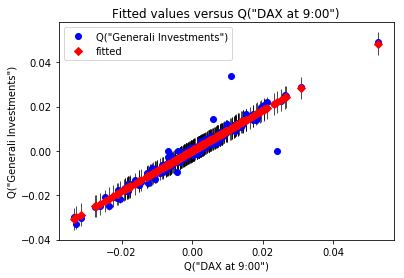

In [28]:
sm.graphics.plot_fit(riskfree_linear_fit_0900, 'Q("DAX at 9:00")')
plt.show()

## Exercise

Let's generate the same ``DataFrames`` that we generated before (one ``DataFrame`` for each fund, with one row for each time), this time using ``df_excess`` instead of ``df``.